# Spectral solar irradiance

SIM SORCE: [source](ftp://acdisc.gsfc.nasa.gov/data/s4pa/SORCE_Level3/SOR3XPSD.010/sorce_xps_L3_c24h_v10_20030210_20110502.txt)


### Plot mean solar spectrum on one day:

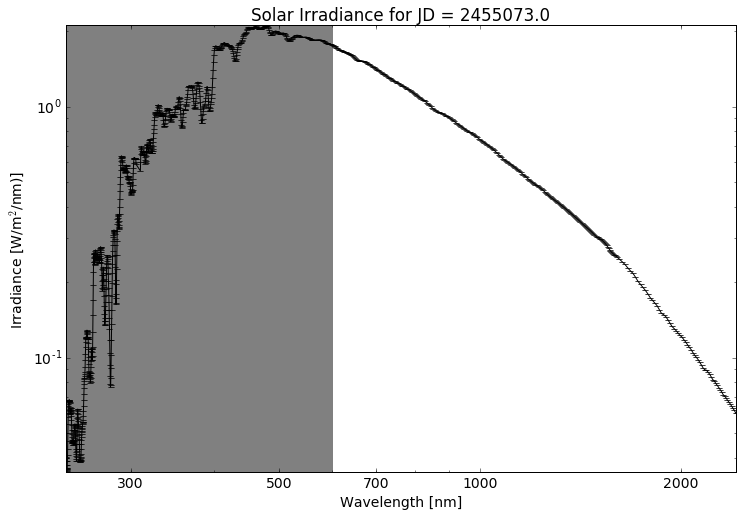

In [8]:
%matplotlib inline

from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import h5py

date = 1997

f = h5py.File('sorce_sim.hdf5', 'r')
spectra = f['spectra']
mean_wavelength = spectra.attrs['wavelengths']
lower_wavelength_limit = 600 # nm
jds = spectra.attrs['jd']

def plot_spectrum_from_index(date_index):
    spectrum = spectra[date_index, :, 0]
    uncertainty = spectra[date_index, :, 1]

    plt.rc('font', size=14)
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.errorbar(mean_wavelength, spectrum, uncertainty, color='k')
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.fill_between([0, 600], spectrum.min(), spectrum.max(), color='gray')
    ax.set(xlim=(mean_wavelength.min(), mean_wavelength.max()),
           ylim=(spectrum.min(), spectrum.max()), 
           xlabel='Wavelength [nm]', ylabel='Irradiance [W/m$^2$/nm)]', 
           title='Solar Irradiance for JD = {0}'.format(jds[date]))

    xticks=[300, 500, 700, 1000, 2000]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)

plot_spectrum_from_index(date)
plt.show()

### Plot difference between spectra of two days:

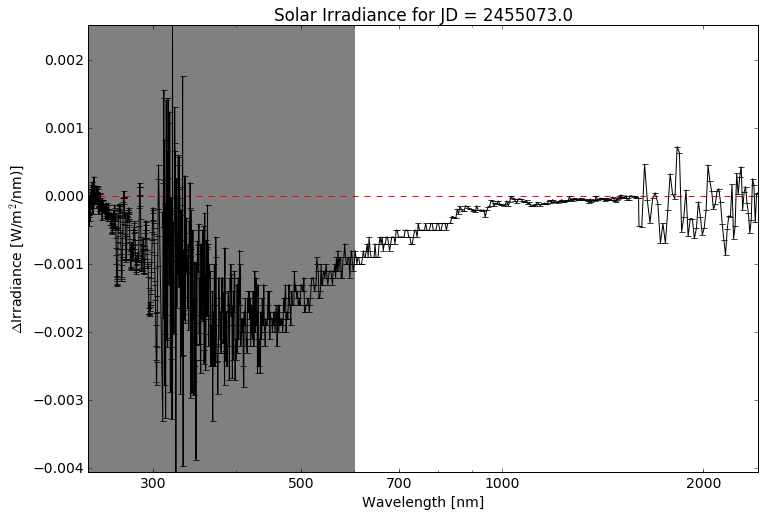

In [9]:
def plot_difference_from_index(date_index1, date_index2):
    spectrum1 = spectra[date_index1, :, 0]
    uncertainty1 = spectra[date_index1, :, 1]
    spectrum2 = spectra[date_index2, :, 0]
    uncertainty2 = spectra[date_index2, :, 1]
    
    difference_spectra = spectrum1 - spectrum2
    difference_uncertainty = np.sqrt(uncertainty1**2 + uncertainty2**2)
    
    plt.rc('font', size=14)
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.axhline(0, ls='--', color='r')
    ax.errorbar(mean_wavelength, difference_spectra, difference_uncertainty, color='k')
    ax.set_xscale("log")
    #ax.set_yscale("log")
    ax.fill_between([0, 600], difference_spectra.min(), difference_spectra.max(), color='gray')
    ax.set(xlim=(mean_wavelength.min(), mean_wavelength.max()),
           ylim=(difference_spectra.min(), difference_spectra.max()), 
           xlabel='Wavelength [nm]', ylabel='$\Delta$Irradiance [W/m$^2$/nm)]', 
           title='Solar Irradiance for JD = {0}'.format(jds[date]))

    xticks=[300, 500, 700, 1000, 2000]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    
plot_difference_from_index(1997, 2308)
plt.show()